In [74]:
#plt96で様々なイオンで実行できるように一般化
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import matplotlib.backends.backend_pdf

#イオン名と原子番号紐づけ(トリチウムはまだ含まず)
ion_dir={101:"h",301:"t", 102:"he", 103:"li", 104:"be", 106:"c", 107:"n", 108:"o", 110:"ne", 114:"si",}

#取り出すイオン入力
I=ion_dir[114]   #ex I=ion_dir[4]
file=('plt96_%s_mod.dat' %I)

f=open(file)
line=f.readline()
line=line[6:]
dens=int(line[:2])   #密度
ev=int(line[3:5])   #電子温度
coff=int(line[6:])   #係数の数

df=pd.read_csv(file,header=1,delim_whitespace=True)

In [75]:
len(df['dens'].unique())

24

In [76]:
print(dens)
print(ev)
print(coff)

24
30
14


In [77]:
df

,dens,coff,-0.6990,-0.5309,-0.3628,-0.1946,-0.0266,0.1416,0.3097,0.4778,...,2.6631,2.8312,2.9994,3.1675,3.3356,3.5037,3.6718,3.8399,4.0080,4.1761
0,8.0,1,-31.6552,-31.0667,-30.2439,-28.8019,-27.5541,-26.6023,-25.8982,-25.3942,...,-24.3659,-24.3722,-24.3786,-24.3849,-24.3913,-24.3977,-24.4040,-24.4104,-24.4167,-24.4231
1,8.0,2,-36.4105,-32.7025,-30.2736,-28.5759,-27.3828,-26.5251,-25.9065,-25.4597,...,-24.8935,-24.9394,-24.9901,-25.0432,-25.0963,-25.1494,-25.2024,-25.2554,-25.3085,-25.3615
2,8.0,3,-35.5012,-33.0528,-30.6094,-28.5715,-27.2766,-26.4057,-25.8081,-25.3763,...,-24.5944,-24.6387,-24.6865,-24.7311,-24.7782,-24.8282,-24.8781,-24.9280,-24.9779,-25.0278
3,8.0,4,-35.5365,-33.6677,-31.7988,-29.9300,-28.1411,-26.9050,-26.0914,-25.5584,...,-24.8009,-24.8516,-24.9081,-24.9641,-25.0219,-25.0813,-25.1410,-25.2006,-25.2602,-25.3198
4,8.0,5,-74.0000,-74.0000,-74.0000,-74.0000,-72.5783,-58.3050,-47.6839,-40.6305,...,-25.1311,-25.1177,-25.1105,-25.1077,-25.1059,-25.1050,-25.1042,-25.1032,-25.1020,-25.1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,16.0,10,-37.5544,-36.4356,-35.3095,-34.1752,-33.0322,-31.8803,-30.7200,-29.5524,...,-25.1537,-25.1494,-25.1580,-25.1768,-25.2037,-25.2365,-25.2742,-25.3158,-25.3616,-25.4095
332,16.0,11,-37.4004,-36.2803,-35.1583,-34.0339,-32.9067,-31.7764,-30.6432,-29.5099,...,-25.2364,-25.2229,-25.2258,-25.2403,-25.2651,-25.2963,-25.3321,-25.3696,-25.4074,-25.4457
333,16.0,12,-31.4006,-30.8745,-30.3483,-29.8222,-29.2961,-28.7700,-28.2439,-27.7178,...,-25.4801,-25.4763,-25.4856,-25.5064,-25.5351,-25.5684,-25.6093,-25.6529,-25.6966,-25.7410
334,16.0,13,-60.8029,-64.6031,-68.4032,-72.2034,-74.0000,-74.0000,-74.0000,-74.0000,...,-27.3012,-26.7953,-26.4648,-26.2507,-26.1146,-26.0301,-25.9802,-25.9519,-25.9401,-25.9382


In [78]:
x=list(df.columns[2:])
x=[float(s) for s in x]

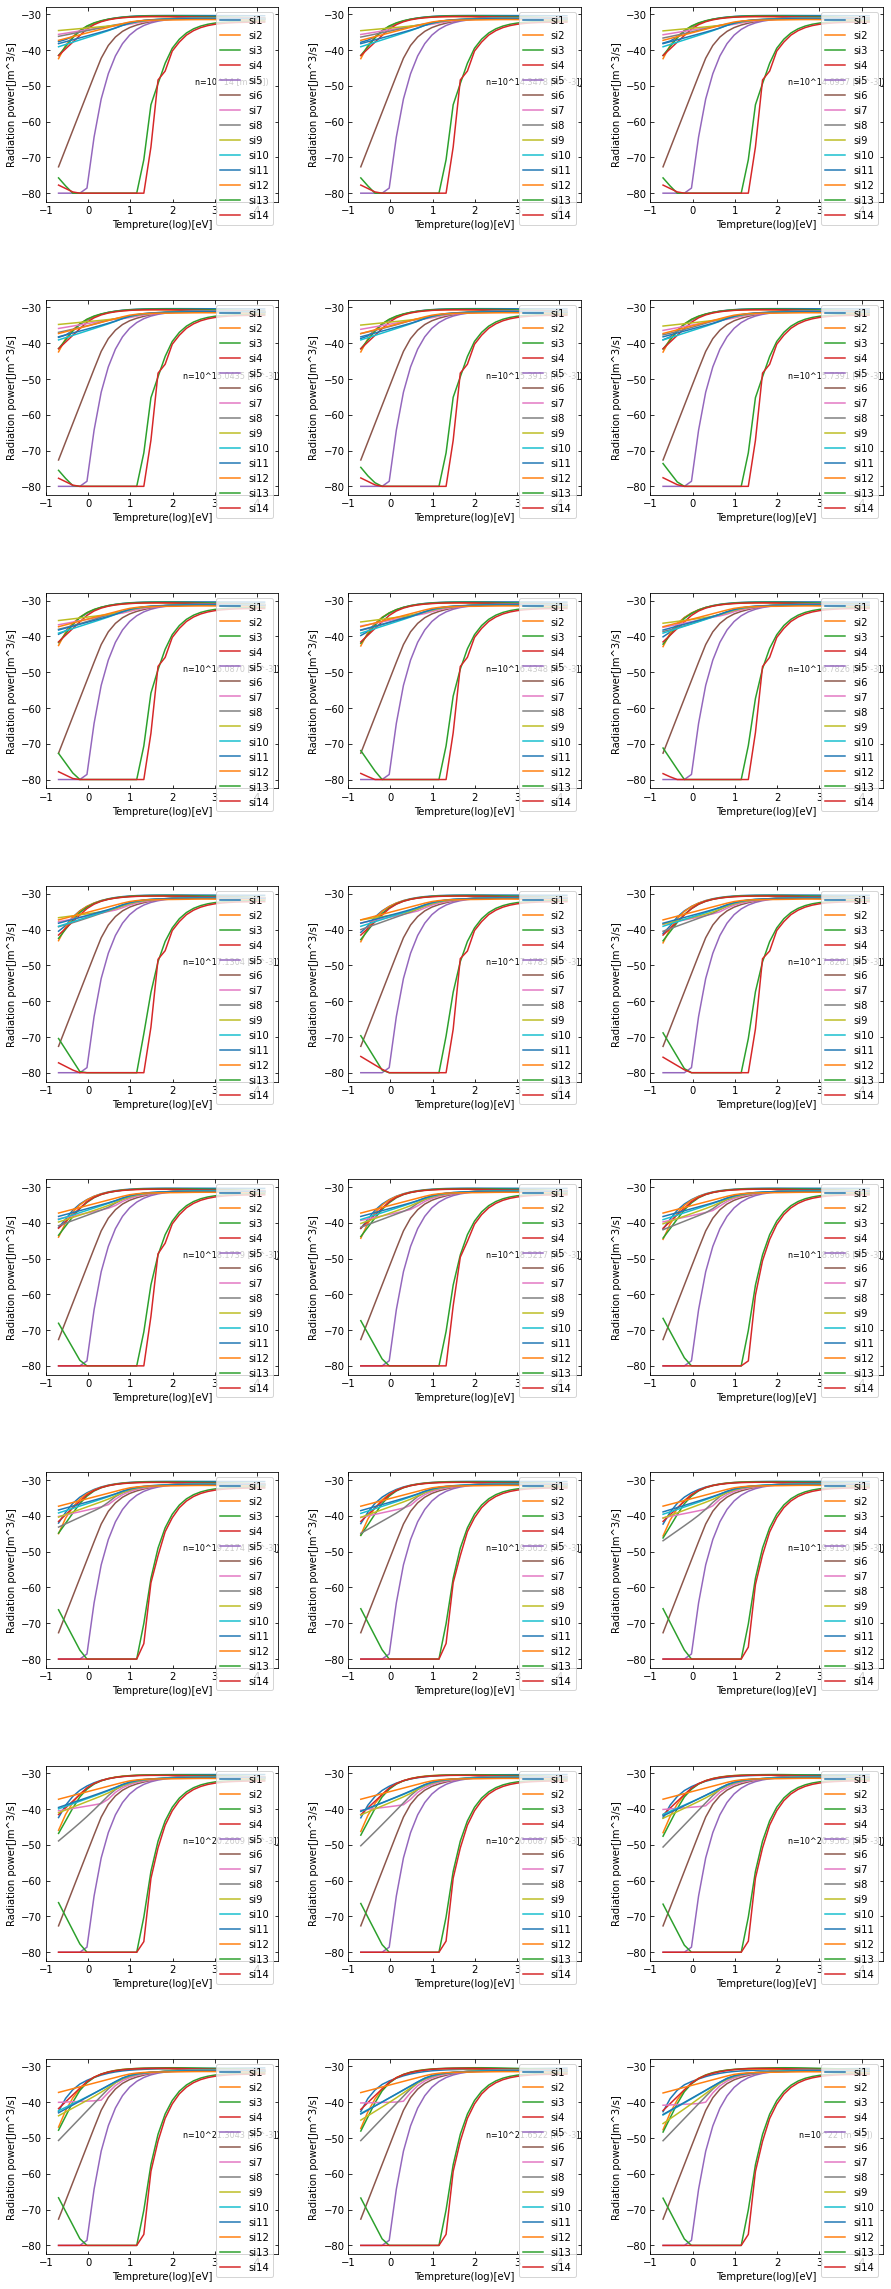

In [79]:
df_group=df.groupby('dens')
n=1   #グラフレイアウトの場所番号
w=15   #グラフ画像の幅
h=(len(df['dens'].unique())/3)*20   #高さ
fig=plt.figure(figsize=(w,h))
for d in df['dens'].unique():      
    ax=fig.add_subplot(30,3,n)
    ax.set_xlim(-1,4.5)
    ax.set_xlabel('Tempreture(log)[eV]')
    ax.set_ylabel('Radiation power[Jm^3/s]')
    plot_memo=('n=10^%s [m^-3])' %(decimal.Decimal(d)+decimal.Decimal(6)))
    ax.annotate(plot_memo, xy=(0.8, 0.6), fontsize=8, xycoords='axes fraction', horizontalalignment='center')
    ax.tick_params(direction='in' , bottom=True ,top=True ,left=True ,right=True)
    decimal.getcontext().prec = 6
    #title=('n=10^%s [m^-3])' %(decimal.Decimal(d)+decimal.Decimal(6)))
    #ax.set_title(title ,y=-0.25)

    
    y_dir={}
    for i in range(coff):
        y=df_group.get_group(d)[i:i+1].values[0][2:]
        decimal.getcontext().prec = 6
        y=[decimal.Decimal(s)-decimal.Decimal(6) for s in y]   #単位をm^3に
        y_dir[i]=y
        label=('%s%s' %(I,(i+1)))
        ax.plot(x,y_dir[i],label=label)
    ax.legend(loc=0)
    n += 1
fig.subplots_adjust(wspace=0.3, hspace=0.5) # グラフ間の隙間調整
plt.savefig('plt96_%s_mod.png' %I)
plt.show()